# Accusaga Assignment To Find Out the Customer Will Buy The 'ABC' Product or Not.

### As From the Problem Statement we can understand that there are two outcomes either he/she will buy the ABC product or they won't buy it

### So from above we can understand that we have to use a classification Algorithm to find the outcome so lets import the classification algorithms and all the other necessary things that are required.

### Importing all the essential python library so that we can perform the following

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore, boxcox, yeojohnson
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, power_transform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_auc_score, roc_curve
import joblib

##### from above we can see that we have imported all the essential python libraries so lets now import the dataset and start working on it.

In [2]:
ds = pd.read_csv("S:\Sumit Projects\Data Science\Accusaga Assessment\DS_dataset.csv")

# Data Understanding

In [3]:
ds.head()

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0


##### from above we can see first five row of the whole dataset.

##### lets see the shape of the data using ds.shape

In [4]:
Rows, Columns = ds.shape
print("By using ds.shape we can see that there are {} number of rows and {} number of columns".format(Rows, Columns))

By using ds.shape we can see that there are 30829 number of rows and 7 number of columns


##### lets see more information about the dataset using ds.info() method this will give us more information about the dataset

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


##### from above we can see that there are 30828 rows and all the columns have all the values so there are no missing values in the dataset lets now see the dataset more clearly

In [6]:
ds.head(10)

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0
5,175229,19.222,2.133,G1,C3,Silver,0
6,175295,41.091,2.536,G1,C4,Silver,1
7,181524,96.706,9.295,G1,C1,Gold,1
8,183955,82.989,5.431,G1,C2,Gold,1
9,232643,2.009,1.084,G1,C1,Silver,1


##### By looking at the Customer ID we can easily tell that all the values of that Column is Unique lets check it by using nunique() method

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [8]:
ds['Customer_ID'].nunique()

30829

##### from above we can see that all the values are unique so we can drop the Customer_ID column as it will not give us more information about the outcomes so lets drop it

In [9]:
df = ds.copy()

In [10]:
df.drop('Customer_ID', 1, inplace=True)

In [11]:
df.head()

,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,41.534,12.123,G1,C1,Bronze,0
1,9.445,0.256,G1,C1,Bronze,0
2,37.599,3.199,G1,C2,Gold,0
3,81.514,1.645,G1,C1,Silver,0
4,46.805,1.706,G1,C1,Silver,0


##### from above we can see that we have droped the Customer_ID column

##### lets now see other column which has categories

In [12]:
print(df['Group'].value_counts())
print(df['Group'].nunique())

G1    19365
G5     8558
G3     1762
G4      494
G6      312
G2      298
G7       21
G8       19
Name: Group, dtype: int64
8


##### from above we can see that there are total 8 categories in the Group Column G1 - 19365, G2 - 298, G3 - 1762, G4 - 494, G5 - 8558, G6 - 312, G7 - 21, G8 - 19

In [13]:
print(df['Category'].value_counts())
print(df['Category'].nunique())

C1    14934
C3     6707
C2     4031
C5     2993
C4     2164
Name: Category, dtype: int64
5


##### from above we can see that there are total 5 categories in the Category Column C1 - 14934, C2 - 4031, C3 - 6707, C4 - 2164, C5 - 2993

In [14]:
print(df['Rating'].value_counts())
print(df['Rating'].nunique())

Bronze    15127
Silver    10171
Gold       5531
Name: Rating, dtype: int64
3


##### from above we can see that there are total 3 catrgories Bronze -15127, Silver - 10171, Gold - 5531 in Rating Column

In [15]:
print(df['Purchased_ABC_product'].value_counts())
print(df['Purchased_ABC_product'].nunique())

1    15524
0    15305
Name: Purchased_ABC_product, dtype: int64
2


##### from above we can see that there are 2 categories that is 1 - Bought the ABC Product, 0 - Didn't Bought the ABC Product

##### From above we can see that both the categories has almost similar counts so it is a balanced dataset

##### lets see descriptive statistics for the dataset using .describe() method

In [16]:
df.describe()

,Var1,Var2,Purchased_ABC_product
count,30829.000000,30829.000000,30829.000000
mean,64.868318,4.994489,0.503552
std,114.373345,9.533546,0.499995
min,0.251000,0.000000,0.000000
25%,13.256000,0.668000,0.000000
50%,31.860000,2.189000,1.000000
75%,68.702000,5.482000,1.000000
max,2909.776000,317.380000,1.000000


<AxesSubplot:>

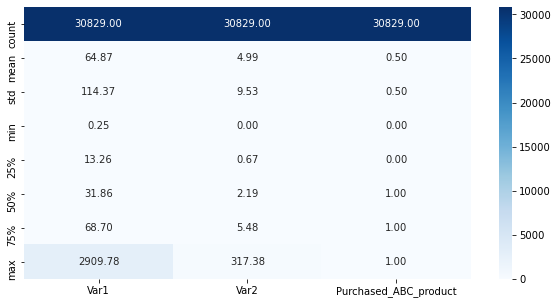

In [17]:
plt.figure(figsize = (10,5))
sns.heatmap(df.describe(), cmap='Blues', fmt ='.2f', annot = True)

##### From the above heatmap we can see that Var1 Column has maximum values as 2909 it cab be an outlier so we will see it before model building and if it's an outlier we will remove it

In [18]:
df.head()

,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,41.534,12.123,G1,C1,Bronze,0
1,9.445,0.256,G1,C1,Bronze,0
2,37.599,3.199,G1,C2,Gold,0
3,81.514,1.645,G1,C1,Silver,0
4,46.805,1.706,G1,C1,Silver,0


# Exploratory Data Analysis

<AxesSubplot:xlabel='Var1'>

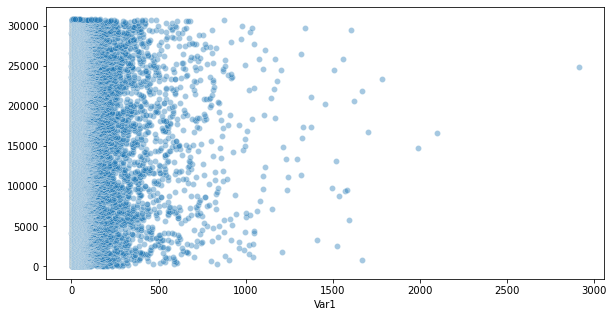

In [19]:
plt.figure(figsize = (10,5))
sns.scatterplot(df['Var1'], df.index, alpha = 0.4)

##### From above we can see that there is a Data Point which is far away it is an outlier

<AxesSubplot:xlabel='Var2'>

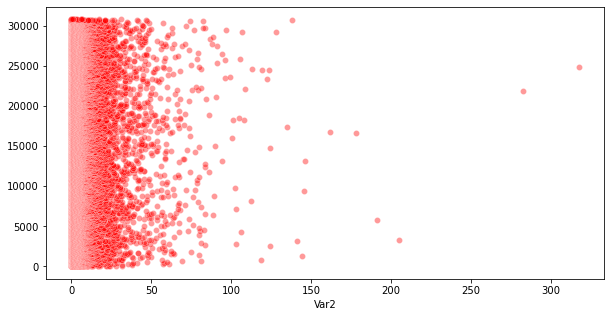

In [20]:
plt.figure(figsize = (10,5))
sns.scatterplot(df['Var2'], df.index, color = 'r', alpha=0.4)

##### In this column also there are some data points that are away from the cluster of points so they can be outliers

<AxesSubplot:xlabel='Group', ylabel='count'>

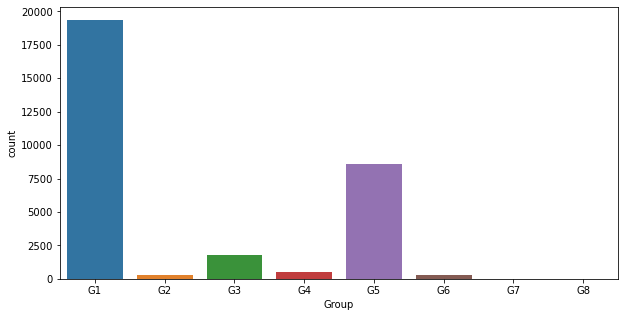

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(df['Group'])

##### From above we can see Count plot of the Column from here we can see which category has the highest number of count in a given dataset

<AxesSubplot:ylabel='None'>

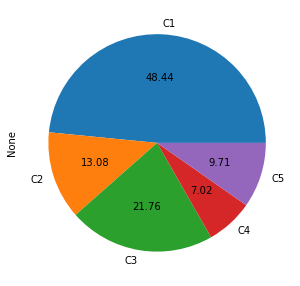

In [22]:
plt.figure(figsize = (10,5))
df.groupby('Category').size().plot(kind='pie', autopct='%.2f')

##### From above we can see Count plot of the Column from here we can see which category has the highest number of count in a given dataset

<AxesSubplot:xlabel='Rating', ylabel='count'>

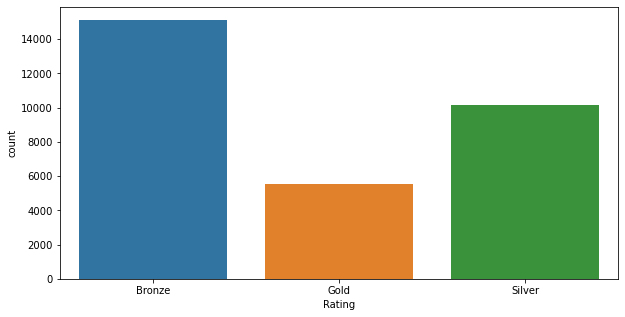

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(df['Rating'])

##### from above we can see that there are three ratings in the dataset Bronze, Gold and Silver

<AxesSubplot:ylabel='None'>

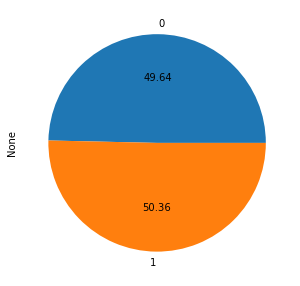

In [24]:
plt.figure(figsize = (10,5))
df.groupby('Purchased_ABC_product').size().plot(kind='pie', autopct='%.2f')

##### This is our target column and from above we can see the count of the Target Variable which is Almost Equal so it is a balance dataset

<AxesSubplot:xlabel='Var2', ylabel='Var1'>

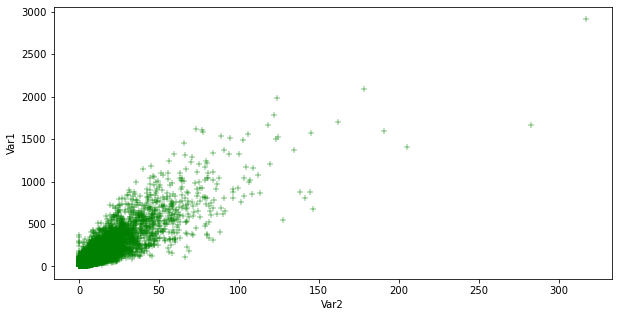

In [25]:
plt.figure(figsize = (10,5))
sns.scatterplot(ds['Var2'], ds['Var1'], color='g', marker = "+")

##### From above we can see a linear relation between the two variables Var1 and Var2 as Var2 increases Var1 will also increase

<Figure size 720x360 with 0 Axes>

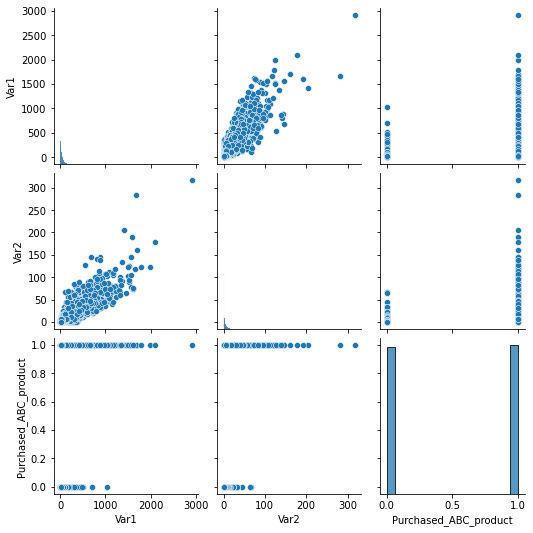

In [26]:
plt.figure(figsize = (10,5))
sns.pairplot(df)

##### lets now see the number of outliers in the dataset by using boxplot

In [27]:
df

,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,41.534,12.123,G1,C1,Bronze,0
1,9.445,0.256,G1,C1,Bronze,0
2,37.599,3.199,G1,C2,Gold,0
3,81.514,1.645,G1,C1,Silver,0
4,46.805,1.706,G1,C1,Silver,0
...,...,...,...,...,...,...
30824,12.094,0.899,G5,C3,Bronze,1
30825,43.214,6.484,G5,C1,Bronze,1
30826,20.902,6.159,G5,C1,Bronze,1
30827,11.443,0.000,G5,C3,Bronze,0


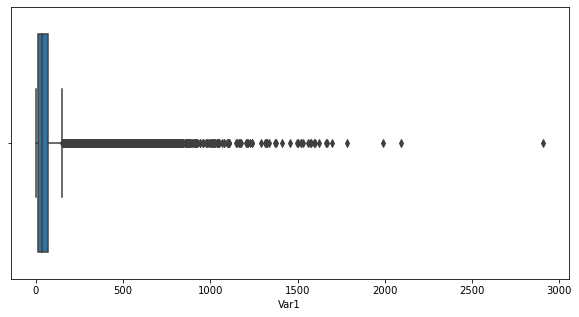

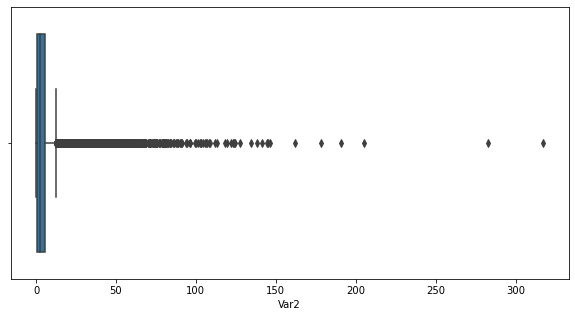

In [28]:
for i in df.columns.drop(['Group','Category','Rating','Purchased_ABC_product'],1):
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])

##### From above we can see that column Var1 and Var2 has many outliers our model need a Normal Distributed data to perform well so we will remove the outliers using Inter Quartile Range and Replace the maximum value with the range

In [29]:
def remove_outliers(col):
    sorted(col)
    Q1, Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    return lower, upper

In [30]:
for i in df.columns.drop(['Group','Category','Rating','Purchased_ABC_product'],1):
    lower, upper = remove_outliers(df[i])
    upr = np.where(df[i] >= upper)
    for j in upr:
        df[i][j] = upper
    lwr = np.where(df[i] <= lower)
    for k in lwr:
        df[i][k] = lower

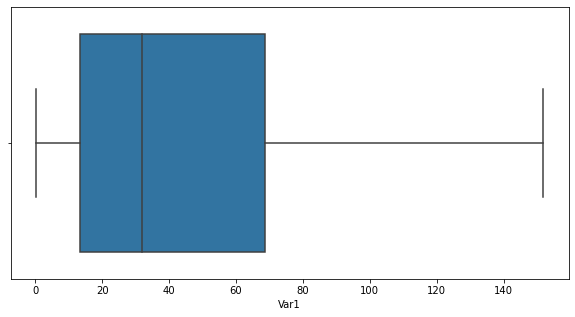

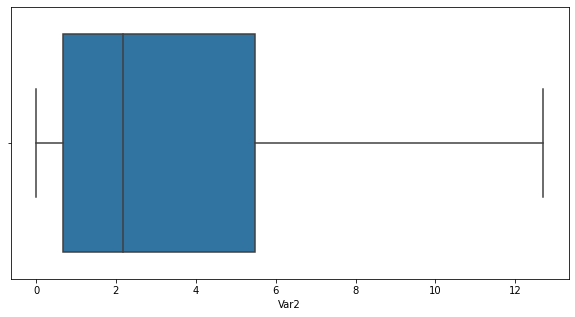

In [31]:
for i in df.columns.drop(['Group','Category','Rating','Purchased_ABC_product'],1):
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])

##### By looking at the above boxplot we can see that we have fixed all the outliers and Replaced them with the upper bound or lower bound using Inter Quantile Range

##### lets check the skewness of the dataset using df.skew()

In [32]:
df.skew()

Var1                     1.135271
Var2                     1.158644
Purchased_ABC_product   -0.014208
dtype: float64

##### So from above we can see that the column var1 and var2 is right skewed so we have to fix this using power transform or by using cuberoot or squareroot first lets see the skewness using density plot

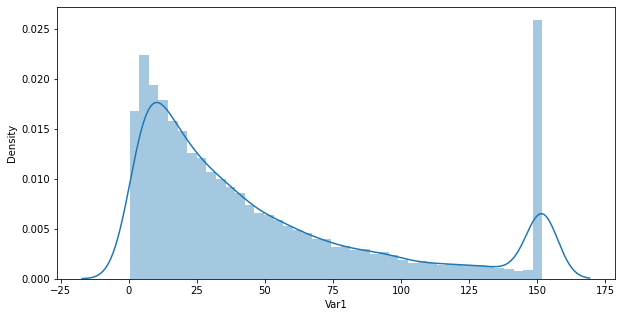

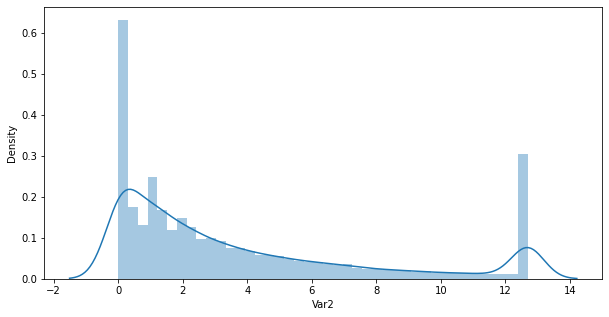

In [33]:
for i in df.columns.drop(['Group','Category','Rating','Purchased_ABC_product'],1):
    plt.figure(figsize = (10,5))
    sns.distplot(df[i])

##### So from above we can see the graphhical representation of skewness and we can see it is positively skewed so lets fix this

In [34]:
for i in  df.columns.drop(['Group','Category','Rating','Purchased_ABC_product'],1):
    if df[i].skew() > 0.5:
        df[i] = np.sqrt(df[i])
    elif df[i].skew() > -0.5:
        df[i] = np.sqrt(df[i])

In [35]:
df.skew()

Var1                     0.496827
Var2                     0.283725
Purchased_ABC_product   -0.014208
dtype: float64

##### from above we can see that we have also fixed the skewness of the dataset lets see the density plot again

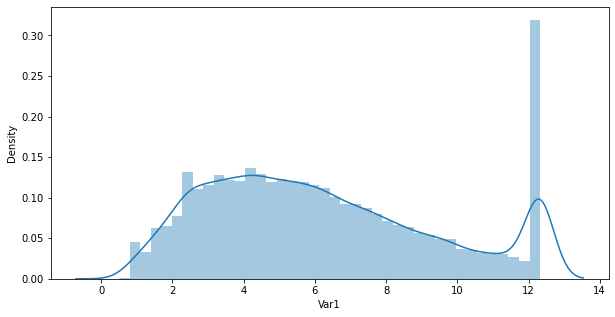

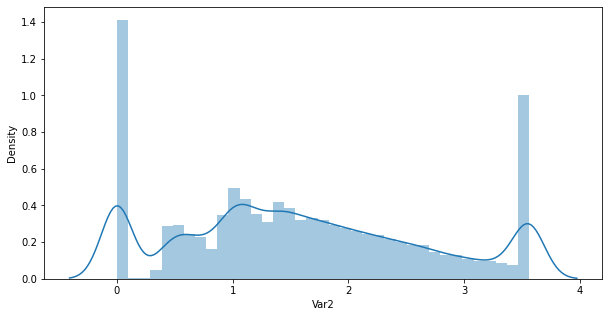

In [36]:
for i in df.columns.drop(['Group','Category','Rating','Purchased_ABC_product'],1):
    plt.figure(figsize = (10,5))
    sns.distplot(df[i])

##### From above we can see that our dataset is now normally distributed

In [37]:
df.head()

,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,6.444688,3.481810,G1,C1,Bronze,0
1,3.073272,0.505964,G1,C1,Bronze,0
2,6.131802,1.788575,G1,C2,Gold,0
3,9.028510,1.282576,G1,C1,Silver,0
4,6.841418,1.306139,G1,C1,Silver,0


##### lets now convert our categorical values to numberic using Label Encoder

In [38]:
le = LabelEncoder()
df['Group'] = le.fit_transform(df['Group'])
df['Category'] = le.fit_transform(df['Category'])
df['Rating'] = le.fit_transform(df['Rating'])

In [39]:
df.head()

,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,6.444688,3.481810,0,0,0,0
1,3.073272,0.505964,0,0,0,0
2,6.131802,1.788575,0,1,1,0
3,9.028510,1.282576,0,0,2,0
4,6.841418,1.306139,0,0,2,0


##### From above we can see that we have Successfully converted our categories to numbers lets now split the dataset and Create our Machine Learning model

In [40]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

##### So as we have Splited our dataset lets Create a Machine Learning model and see the accuracy of our Model

In [42]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
print("Accuracy Score", accuracy_score(Y_test, pred)*100,'%')
print("Classification Report: ", classification_report(Y_test, pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, pred))

Accuracy Score 76.67855984430749 %
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.79      0.77      1561
           1       0.77      0.75      0.76      1522

    accuracy                           0.77      3083
   macro avg       0.77      0.77      0.77      3083
weighted avg       0.77      0.77      0.77      3083

Confusion Matrix:  [[1229  332]
 [ 387 1135]]


##### So by using Logistic Regression we got 77% accuracy on our testing set lets see which model Performs Better and find out the best random state

In [43]:
maxacc = 0
maxrs = 0
for i in range(0,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i

print("Maximum Accuracy is {} at Random State = {}".format(maxacc, maxrs) )

Maximum Accuracy is 0.7718131689912423 at Random State = 62


##### So we are getting maximum accuracy ar random state 62 so we will use Random state 62 for all the models and see which model performs well

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=62)

In [45]:
def ML_Model(ModelName):
    print(ModelName)
    model = ModelName()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print("Accuracy Score: ",accuracy_score(Y_test, pred)*100,'%')
    print("Classification Report: ", classification_report(Y_test, pred))
    print("Confusion Matrix: ", confusion_matrix(Y_test, pred))
    score = cross_val_score(model, X, Y, cv = 5)
    score = score.mean()
    print("Cross Validation Score for Overfitting: ", score*100,'%')

In [46]:
ML_Model(LogisticRegression)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy Score:  77.18131689912423 %
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.79      0.78      3108
           1       0.78      0.75      0.77      3058

    accuracy                           0.77      6166
   macro avg       0.77      0.77      0.77      6166
weighted avg       0.77      0.77      0.77      6166

Confusion Matrix:  [[2467  641]
 [ 766 2292]]
Cross Validation Score for Overfitting:  75.8149799320713 %


In [47]:
ML_Model(DecisionTreeClassifier)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy Score:  71.56989944858904 %
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.71      0.72      3108
           1       0.71      0.72      0.72      3058

    accuracy                           0.72      6166
   macro avg       0.72      0.72      0.72      6166
weighted avg       0.72      0.72      0.72      6166

Confusion Matrix:  [[2208  900]
 [ 853 2205]]
Cross Validation Score for Overfitting:  71.21540804437593 %


In [48]:
ML_Model(ExtraTreeClassifier)

<class 'sklearn.tree._classes.ExtraTreeClassifier'>
Accuracy Score:  70.93739863769056 %
Classification Report:                precision    recall  f1-score   support

           0       0.71      0.71      0.71      3108
           1       0.71      0.71      0.71      3058

    accuracy                           0.71      6166
   macro avg       0.71      0.71      0.71      6166
weighted avg       0.71      0.71      0.71      6166

Confusion Matrix:  [[2203  905]
 [ 887 2171]]
Cross Validation Score for Overfitting:  70.46939354790509 %


In [49]:
ML_Model(RandomForestClassifier)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy Score:  74.39182614336684 %
Classification Report:                precision    recall  f1-score   support

           0       0.75      0.73      0.74      3108
           1       0.74      0.75      0.75      3058

    accuracy                           0.74      6166
   macro avg       0.74      0.74      0.74      6166
weighted avg       0.74      0.74      0.74      6166

Confusion Matrix:  [[2279  829]
 [ 750 2308]]
Cross Validation Score for Overfitting:  73.94012846525922 %


In [50]:
ML_Model(AdaBoostClassifier)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Accuracy Score:  77.53811222834901 %
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.71      0.76      3108
           1       0.74      0.84      0.79      3058

    accuracy                           0.78      6166
   macro avg       0.78      0.78      0.77      6166
weighted avg       0.78      0.78      0.77      6166

Confusion Matrix:  [[2220  888]
 [ 497 2561]]
Cross Validation Score for Overfitting:  76.32425469025519 %


In [51]:
ML_Model(SVC)

<class 'sklearn.svm._classes.SVC'>
Accuracy Score:  76.95426532598118 %
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.73      0.76      3108
           1       0.75      0.81      0.78      3058

    accuracy                           0.77      6166
   macro avg       0.77      0.77      0.77      6166
weighted avg       0.77      0.77      0.77      6166

Confusion Matrix:  [[2270  838]
 [ 583 2475]]
Cross Validation Score for Overfitting:  76.04853447693036 %


In [52]:
ML_Model(GaussianNB)

<class 'sklearn.naive_bayes.GaussianNB'>
Accuracy Score:  74.78105741161207 %
Classification Report:                precision    recall  f1-score   support

           0       0.72      0.81      0.77      3108
           1       0.78      0.68      0.73      3058

    accuracy                           0.75      6166
   macro avg       0.75      0.75      0.75      6166
weighted avg       0.75      0.75      0.75      6166

Confusion Matrix:  [[2533  575]
 [ 980 2078]]
Cross Validation Score for Overfitting:  73.88173325241448 %


In [53]:
ML_Model(XGBClassifier)

<class 'xgboost.sklearn.XGBClassifier'>
[15:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  77.06779111255271 %
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.74      0.76      3108
           1       0.75      0.80      0.78      3058

    accuracy                           0.77      6166
   macro avg       0.77      0.77      0.77      6166
weighted avg       0.77      0.77      0.77      6166

Confusion Matrix:  [[2294  814]
 [ 600 2458]]
[15:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed fro

In [54]:
ML_Model(XGBRFClassifier)

<class 'xgboost.sklearn.XGBRFClassifier'>
[15:58:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score:  77.60298410638988 %
Classification Report:                precision    recall  f1-score   support

           0       0.81      0.73      0.77      3108
           1       0.75      0.83      0.79      3058

    accuracy                           0.78      6166
   macro avg       0.78      0.78      0.78      6166
weighted avg       0.78      0.78      0.78      6166

Confusion Matrix:  [[2259  849]
 [ 532 2526]]
[15:58:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed f

##### We can remove the warning by using Verbosity = 0 in XGBClassifier and XGBRFClassifier

##### Lets find our best models with less errors

##### 1) Logistic Regression
##### 2) Adaboost
##### 3) SVC
##### 4) XGBClassifier

In [55]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, predlr)*100,'%')
print("Classification Report: ", classification_report(Y_test, predlr))
print("Confusion Matrix: ", confusion_matrix(Y_test, predlr))
score = cross_val_score(lr, X, Y, cv = 5)
score = score.mean()
print("Cross Validation Score for Overfitting: ", score*100,'%')

Accuracy Score:  77.18131689912423 %
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.79      0.78      3108
           1       0.78      0.75      0.77      3058

    accuracy                           0.77      6166
   macro avg       0.77      0.77      0.77      6166
weighted avg       0.77      0.77      0.77      6166

Confusion Matrix:  [[2467  641]
 [ 766 2292]]
Cross Validation Score for Overfitting:  75.8149799320713 %


In [56]:
adb = AdaBoostClassifier()
adb.fit(X_train, Y_train)
predadb = adb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, predadb)*100,'%')
print("Classification Report: ", classification_report(Y_test, predadb))
print("Confusion Matrix: ", confusion_matrix(Y_test, predadb))
scoreadb = cross_val_score(adb, X, Y, cv = 5)
scoreadb = scoreadb.mean()
print("Cross Validation Score for Overfitting: ", scoreadb*100,'%')

Accuracy Score:  77.53811222834901 %
Classification Report:                precision    recall  f1-score   support

           0       0.82      0.71      0.76      3108
           1       0.74      0.84      0.79      3058

    accuracy                           0.78      6166
   macro avg       0.78      0.78      0.77      6166
weighted avg       0.78      0.78      0.77      6166

Confusion Matrix:  [[2220  888]
 [ 497 2561]]
Cross Validation Score for Overfitting:  76.32425469025519 %


In [57]:
svc = SVC()
svc.fit(X_train, Y_train)
predsvc = svc.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, predsvc)*100,'%')
print("Classification Report: ", classification_report(Y_test, predsvc))
print("Confusion Matrix: ", confusion_matrix(Y_test, predsvc))
scoresvc = cross_val_score(svc, X, Y, cv = 5)
scoresvc = scoresvc.mean()
print("Cross Validation Score for Overfitting: ", scoresvc*100,'%')

Accuracy Score:  76.95426532598118 %
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.73      0.76      3108
           1       0.75      0.81      0.78      3058

    accuracy                           0.77      6166
   macro avg       0.77      0.77      0.77      6166
weighted avg       0.77      0.77      0.77      6166

Confusion Matrix:  [[2270  838]
 [ 583 2475]]
Cross Validation Score for Overfitting:  76.04853447693036 %


In [58]:
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, Y_train)
predxgb = xgb.predict(X_test)
print("Accuracy Score: ",accuracy_score(Y_test, predxgb)*100,'%')
print("Classification Report: ", classification_report(Y_test, predxgb))
print("Confusion Matrix: ", confusion_matrix(Y_test, predxgb))
scorexgb = cross_val_score(xgb, X, Y, cv = 5)
scorexgb = scoresvc.mean()
print("Cross Validation Score for Overfitting: ", scorexgb*100,'%')

Accuracy Score:  77.06779111255271 %
Classification Report:                precision    recall  f1-score   support

           0       0.79      0.74      0.76      3108
           1       0.75      0.80      0.78      3058

    accuracy                           0.77      6166
   macro avg       0.77      0.77      0.77      6166
weighted avg       0.77      0.77      0.77      6166

Confusion Matrix:  [[2294  814]
 [ 600 2458]]
Cross Validation Score for Overfitting:  76.04853447693036 %


##### lets see the auc and Roc Curve to find out our best model

In [59]:
fpr, tpr, threshold = roc_curve(Y_test, predlr)
roc_auc1 = auc(fpr, tpr)
fpr1, tpr1, threshold = roc_curve(Y_test, predadb)
roc_auc2 = auc(fpr1, tpr1)
fpr2, tpr2, threshold = roc_curve(Y_test, predsvc)
roc_auc3 = auc(fpr2, tpr2)
fpr3, tpr3, threshold = roc_curve(Y_test, predxgb)
roc_auc4 = auc(fpr3,tpr3)

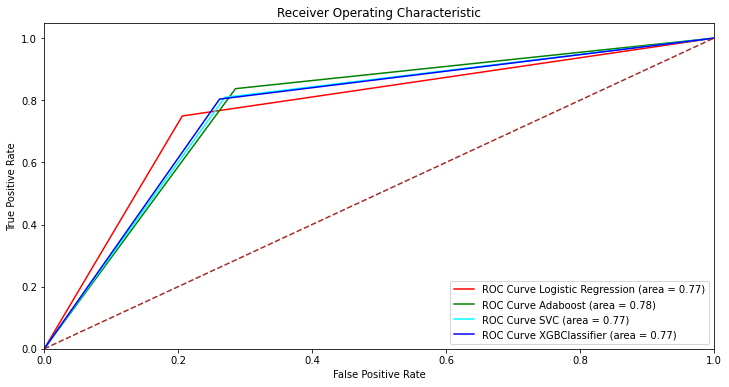

In [60]:
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, color='red', label = "ROC Curve Logistic Regression (area = %0.2f)" %roc_auc1)
plt.plot(fpr1, tpr1, color='green', label = "ROC Curve Adaboost (area = %0.2f)" %roc_auc2)
plt.plot(fpr2, tpr2, color='cyan', label = "ROC Curve SVC (area = %0.2f)" %roc_auc3)
plt.plot(fpr3, tpr3, color='blue', label = "ROC Curve XGBClassifier (area = %0.2f)" %roc_auc4)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

##### from AUC and ROC Curve we can see that all the models are performing well So now we will compare all the model and pick the best model for our dataset

##### So from above we can see that Adaboost is Performing really well

##### By looking at the confusion matrix we can see that in Adaboost the False Negative is low that means we have predicted that the person will not buy the product but they will buy it but it is less as compared to other models

In [61]:
joblib.dump(adb, 'Accusaga.pkl')

['Accusaga.pkl']

##### We have saved our model using joblib at we can use it for deployment purpose

##### lets find the probablity of the person those we will buy the product

In [62]:
prob = adb.predict_proba(X_test)[:]

In [63]:
Probalbity = []
for i in prob:
    Probalbity.append(i[1]*100)

In [64]:
Data = {
    'Predicted Values' : predadb,
    'Probablity of Person Buying ABC Product': Probalbity
}

In [65]:
Final = pd.DataFrame.from_dict(Data)

In [66]:
Final

,Predicted Values,Probablity of Person Buying ABC Product
0,1,50.065059
1,0,49.492294
2,0,49.475971
3,0,49.557600
4,0,49.895511
...,...,...
6161,1,51.362945
6162,0,49.701423
6163,0,32.257754
6164,1,50.146467


##### If the Probablity of Person Buying the Product is >=49 % we will consider that they will buy the product

##### lets now show some pandas visualization on the table

In [67]:
Final.style.applymap(lambda x: 'color : Green' if x >= 49 else 'color:red', subset='Probablity of Person Buying ABC Product')

,Predicted Values,Probablity of Person Buying ABC Product
0,1,50.065059
1,0,49.492294
2,0,49.475971
3,0,49.557600
4,0,49.895511
5,1,51.362945
6,0,47.744077
7,1,50.012379
8,1,51.615507
9,1,50.516084


# We can Contact the Customer Which has a Probablity of more that 49% and Marked green on the dataframe 

##### Now lets see the Visualization of the Dataset which is influencing our model the most

<AxesSubplot:>

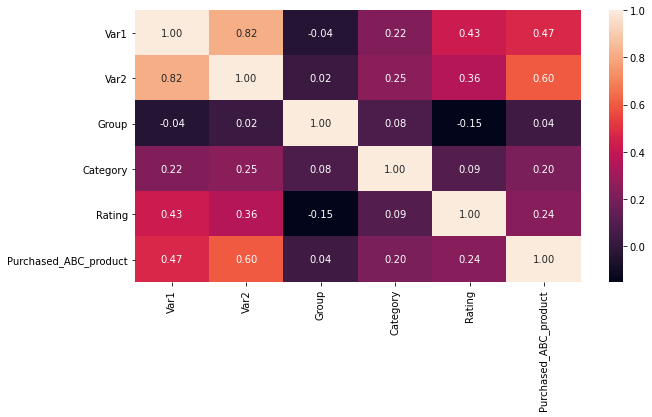

In [68]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, fmt='.2f')

##### from above we can see that Var1 and Var2 has the heighest corlinearity between them and it is affect aour model the most
##### Then we have 60% Colinearity between Var2 and Purchased ABC Product
##### Then we have 47% Colinearity betweeen Var1 and Purchased ABC Product
##### Then we have 43% Colinearity between Var1 and Rating
#### From above we can see that Var1 and var2 if influencing our model the most to predict this kind of result